## Métodos de Runge-Kutta de 2ª Ordem + Euler

Este notebook implementa quatro métodos para resolução numérica de EDOs:
- Heun (RK2 com \u03b1 = 1/2)
- Ponto Médio (RK2 com \u03b1 = 1)
- Ralston (RK2 com \u03b1 = 2/3)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun"):
    print(f"\nMétodo de {metodo.capitalize()}\n")
    print(f"{'ITER.':<6}{'x0':<10}{'y0':<15}{'K1':<15}{'K2':<15}{'|yn - yn-1|':<15}")
    print("-" * 76)

    x_vals = [x0]
    y_vals = [y0]

    for i in range(n):
        x_atual = x_vals[-1]
        y_atual = y_vals[-1]

        if metodo.lower() == "heun":
            k1 = f(x_atual, y_atual)
            k2 = f(x_atual + h, y_atual + h * k1)
            y_next = y_atual + (h / 2) * (k1 + k2)
        elif metodo.lower() == "ponto medio":
            k1 = f(x_atual, y_atual)
            k2 = f(x_atual + h / 2, y_atual + h * k1 / 2)
            y_next = y_atual + h * k2
        elif metodo.lower() == "ralston":
            k1 = f(x_atual, y_atual)
            k2 = f(x_atual + (3/4)*h, y_atual + (3/4)*h*k1)
            y_next = y_atual + h * (k1 + 2 * k2) / 3
        else:
            raise ValueError("Método inválido")

        # erro comparando y_atual com y anterior
        if i == 0:
            erro = '-'
        else:
            y_anterior = y_vals[-2]
            erro = abs(y_atual - y_anterior)

        print(f"{i:<6}{x_atual:<10.4f}{y_atual:<15.4f}{k1:<15.4f}{k2:<15.4f}{erro if erro == '-' else f'{erro:<15.4f}'}")

        x_vals.append(x_atual + h)
        y_vals.append(y_next)

    # Plot
    plt.figure(figsize=(12, 5))

    plt.plot(x_vals, y_vals, marker='o', label='y(x)')
    erros_numericos = [0] + [abs(y_vals[i] - y_vals[i-1]) for i in range(2, len(y_vals))]
    erros_numericos = [0] + erros_numericos  # alinhamento com x_vals
    plt.plot(x_vals, erros_numericos, marker='x', linestyle='--', label='Erro |yᵢ - yᵢ₋₁|')
    plt.title(f'Solução e Erro - Método {metodo.capitalize()}')
    plt.xlabel('x')
    plt.ylabel('y / erro')
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(x_vals), np.array(y_vals)

1 questão - atv pontuada 05/06


Método de Heun

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     0.0000    3.0000         -0.1039        -0.1037        -
1     0.1000    2.9896         -0.1037        -0.1036        0.0104         
2     0.2000    2.9793         -0.1036        -0.1034        0.0104         
3     0.3000    2.9689         -0.1034        -0.1032        0.0103         
4     0.4000    2.9586         -0.1032        -0.1030        0.0103         
5     0.5000    2.9483         -0.1030        -0.1028        0.0103         
6     0.6000    2.9380         -0.1028        -0.1027        0.0103         
7     0.7000    2.9277         -0.1027        -0.1025        0.0103         
8     0.8000    2.9174         -0.1025        -0.1023        0.0103         
9     0.9000    2.9072         -0.1023        -0.1021        0.0102         
10    1.0000    2.8970         -0.1021        -0.1019        0.0102      

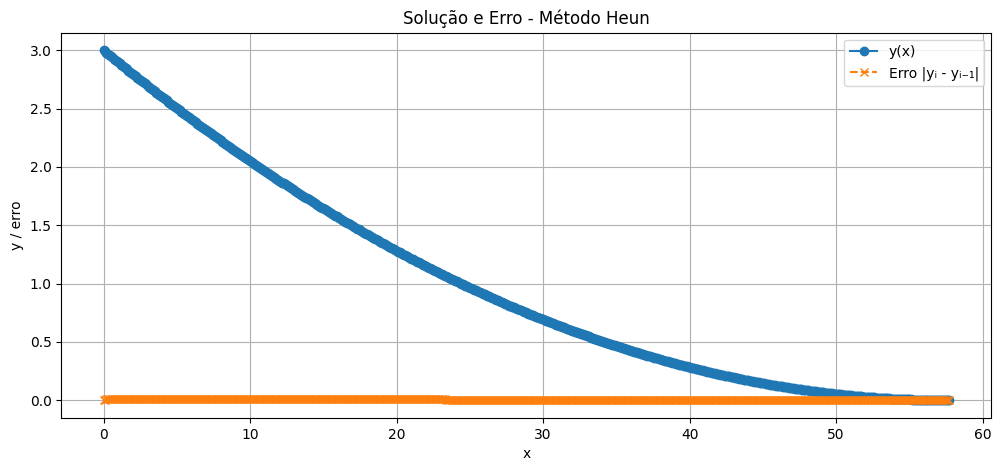

In [20]:
# Definição da função diferencial
f = lambda x, y: -0.06*y**(1/2)

# Condições iniciais
x0 = 0
y0 = 3
h = 0.1
n = 577

x_vals, y_vals = runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun")


Método de Ponto medio

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     0.0000    3.0000         -0.1039        -0.1038        -
1     0.1000    2.9896         -0.1037        -0.1037        0.0104         
2     0.2000    2.9793         -0.1036        -0.1035        0.0104         
3     0.3000    2.9689         -0.1034        -0.1033        0.0103         
4     0.4000    2.9586         -0.1032        -0.1031        0.0103         
5     0.5000    2.9483         -0.1030        -0.1029        0.0103         
6     0.6000    2.9380         -0.1028        -0.1028        0.0103         
7     0.7000    2.9277         -0.1027        -0.1026        0.0103         
8     0.8000    2.9174         -0.1025        -0.1024        0.0103         
9     0.9000    2.9072         -0.1023        -0.1022        0.0102         
10    1.0000    2.8970         -0.1021        -0.1020        0.010

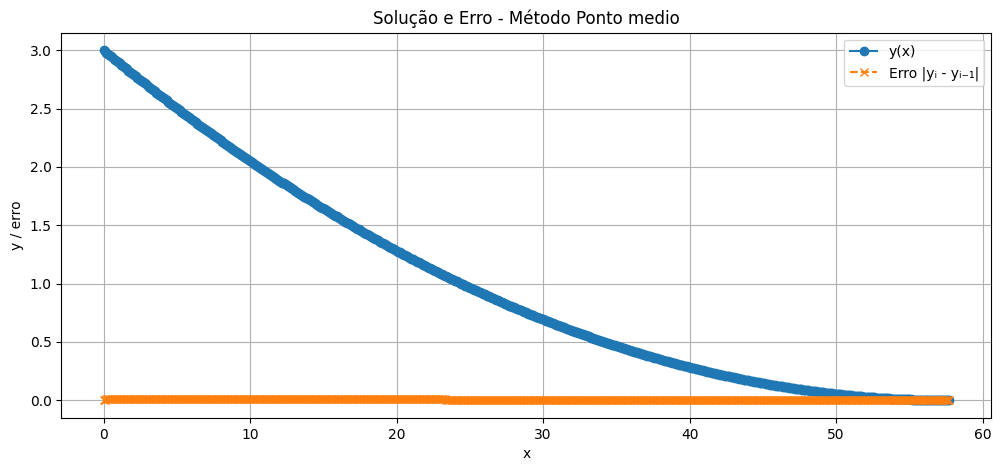

In [21]:
# Definição da função diferencial
f = lambda x, y: -0.06*y**(1/2)

# Condições iniciais
x0 = 0
y0 = 3
h = 0.1
n = 577

x_vals, y_vals = runge_kutta_2_ordem(f, x0, y0, h, n, metodo="ponto medio")


Método de Ralston

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     0.0000    3.0000         -0.1039        -0.1038        -
1     0.1000    2.9896         -0.1037        -0.1036        0.0104         
2     0.2000    2.9793         -0.1036        -0.1034        0.0104         
3     0.3000    2.9689         -0.1034        -0.1032        0.0103         
4     0.4000    2.9586         -0.1032        -0.1031        0.0103         
5     0.5000    2.9483         -0.1030        -0.1029        0.0103         
6     0.6000    2.9380         -0.1028        -0.1027        0.0103         
7     0.7000    2.9277         -0.1027        -0.1025        0.0103         
8     0.8000    2.9174         -0.1025        -0.1023        0.0103         
9     0.9000    2.9072         -0.1023        -0.1022        0.0102         
10    1.0000    2.8970         -0.1021        -0.1020        0.0102   

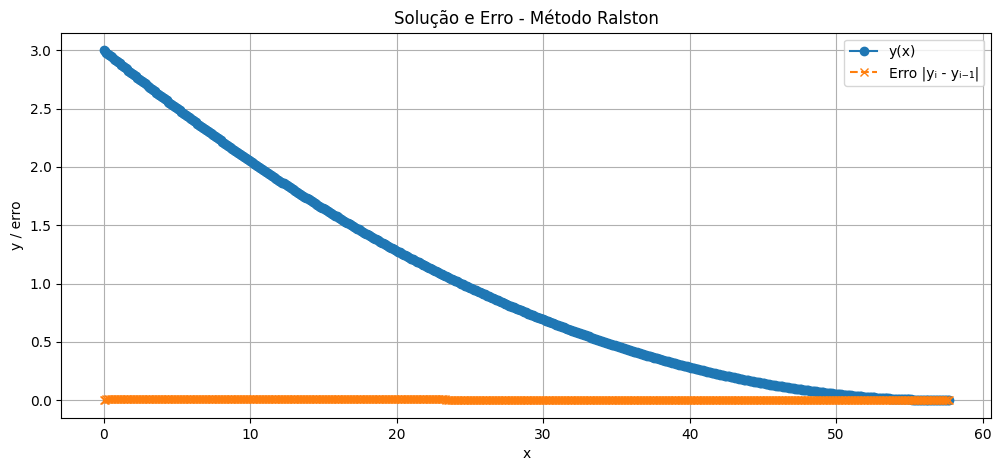

In [23]:
# Definição da função diferencial
f = lambda x, y: -0.06*y**(1/2)

# Condições iniciais
x0 = 0
y0 = 3
h = 0.1
n = 577

x_vals, y_vals = runge_kutta_2_ordem(f, x0, y0, h, n, metodo="ralston")


2 questão - atv pontuada 05/06


Método de Heun

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     0.0000    1.0000         0.0000         0.0100         -
1     0.0100    1.0001         0.0100         0.0200         0.0001         
2     0.0200    1.0002         0.0200         0.0300         0.0002         
3     0.0300    1.0005         0.0300         0.0401         0.0003         
4     0.0400    1.0008         0.0401         0.0502         0.0004         
5     0.0500    1.0013         0.0502         0.0603         0.0005         
6     0.0600    1.0018         0.0603         0.0705         0.0006         
7     0.0700    1.0025         0.0705         0.0808         0.0007         
8     0.0800    1.0032         0.0808         0.0911         0.0008         
9     0.0900    1.0041         0.0911         0.1015         0.0009         
10    0.1000    1.0050         0.1015         0.1120         0.0010      

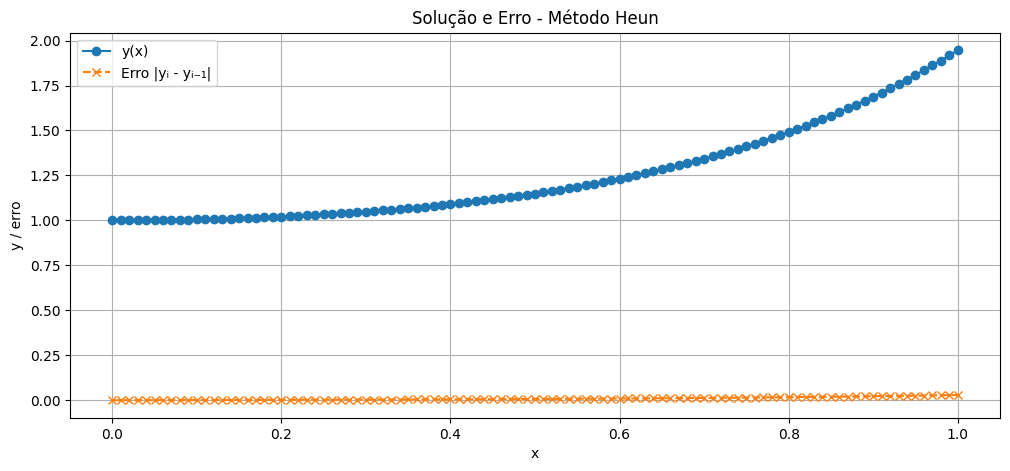

In [38]:
# Definição da função diferencial
f = lambda x, y: x**(3) + (x * y)

# Condições iniciais
x0 = 0
y0 = 1
h = 0.01
n = 100

x_vals, y_vals = runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun")


Método de Ponto medio

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     0.0000    1.0000         0.0000         0.0050         -
1     0.0100    1.0001         0.0100         0.0150         0.0001         
2     0.0200    1.0002         0.0200         0.0250         0.0002         
3     0.0300    1.0005         0.0300         0.0351         0.0003         
4     0.0400    1.0008         0.0401         0.0451         0.0004         
5     0.0500    1.0013         0.0502         0.0552         0.0005         
6     0.0600    1.0018         0.0603         0.0654         0.0006         
7     0.0700    1.0025         0.0705         0.0756         0.0007         
8     0.0800    1.0032         0.0808         0.0859         0.0008         
9     0.0900    1.0041         0.0911         0.0963         0.0009         
10    0.1000    1.0050         0.1015         0.1067         0.001

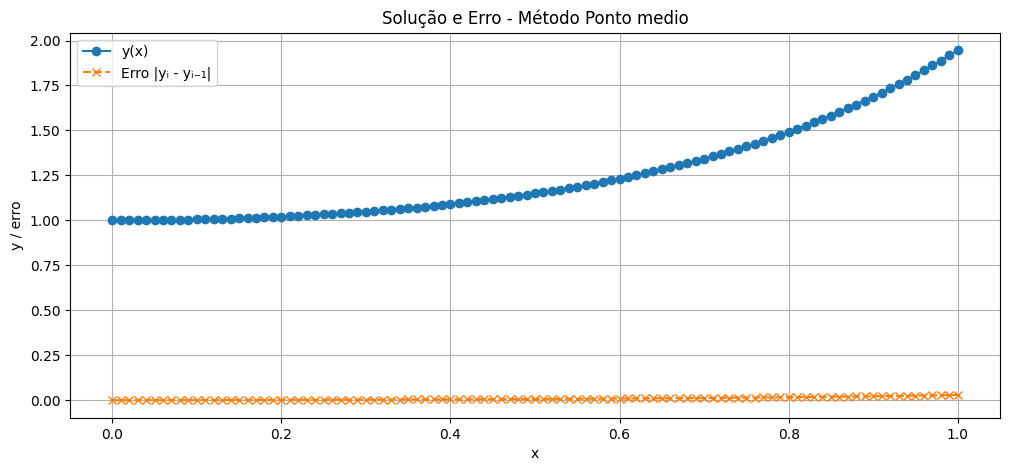

In [39]:
# Definição da função diferencial
f = lambda x, y: x**(3) + (x * y)

# Condições iniciais
x0 = 0
y0 = 1
h = 0.01
n = 100

x_vals, y_vals = runge_kutta_2_ordem(f, x0, y0, h, n, metodo="ponto medio")


Método de Ralston

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     0.0000    1.0000         0.0000         0.0075         -
1     0.0100    1.0001         0.0100         0.0175         0.0001         
2     0.0200    1.0002         0.0200         0.0275         0.0002         
3     0.0300    1.0005         0.0300         0.0376         0.0003         
4     0.0400    1.0008         0.0401         0.0477         0.0004         
5     0.0500    1.0013         0.0502         0.0578         0.0005         
6     0.0600    1.0018         0.0603         0.0680         0.0006         
7     0.0700    1.0025         0.0705         0.0782         0.0007         
8     0.0800    1.0032         0.0808         0.0885         0.0008         
9     0.0900    1.0041         0.0911         0.0989         0.0009         
10    0.1000    1.0050         0.1015         0.1094         0.0010   

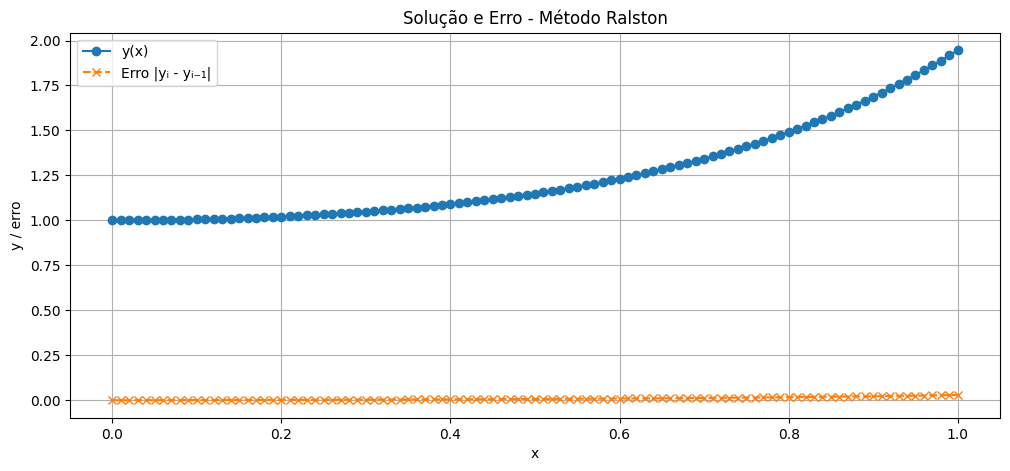

In [40]:
# Definição da função diferencial
f = lambda x, y: x**(3) + (x * y)

# Condições iniciais
x0 = 0
y0 = 1
h = 0.01
n = 100

x_vals, y_vals = runge_kutta_2_ordem(f, x0, y0, h, n, metodo="ralston")